## Dataset Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Import modules

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Preprocessing the dataset

In [223]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='Class', ylabel='count'>

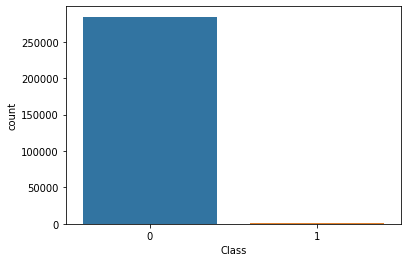

In [ ]:
sns.countplot(df['Class'])

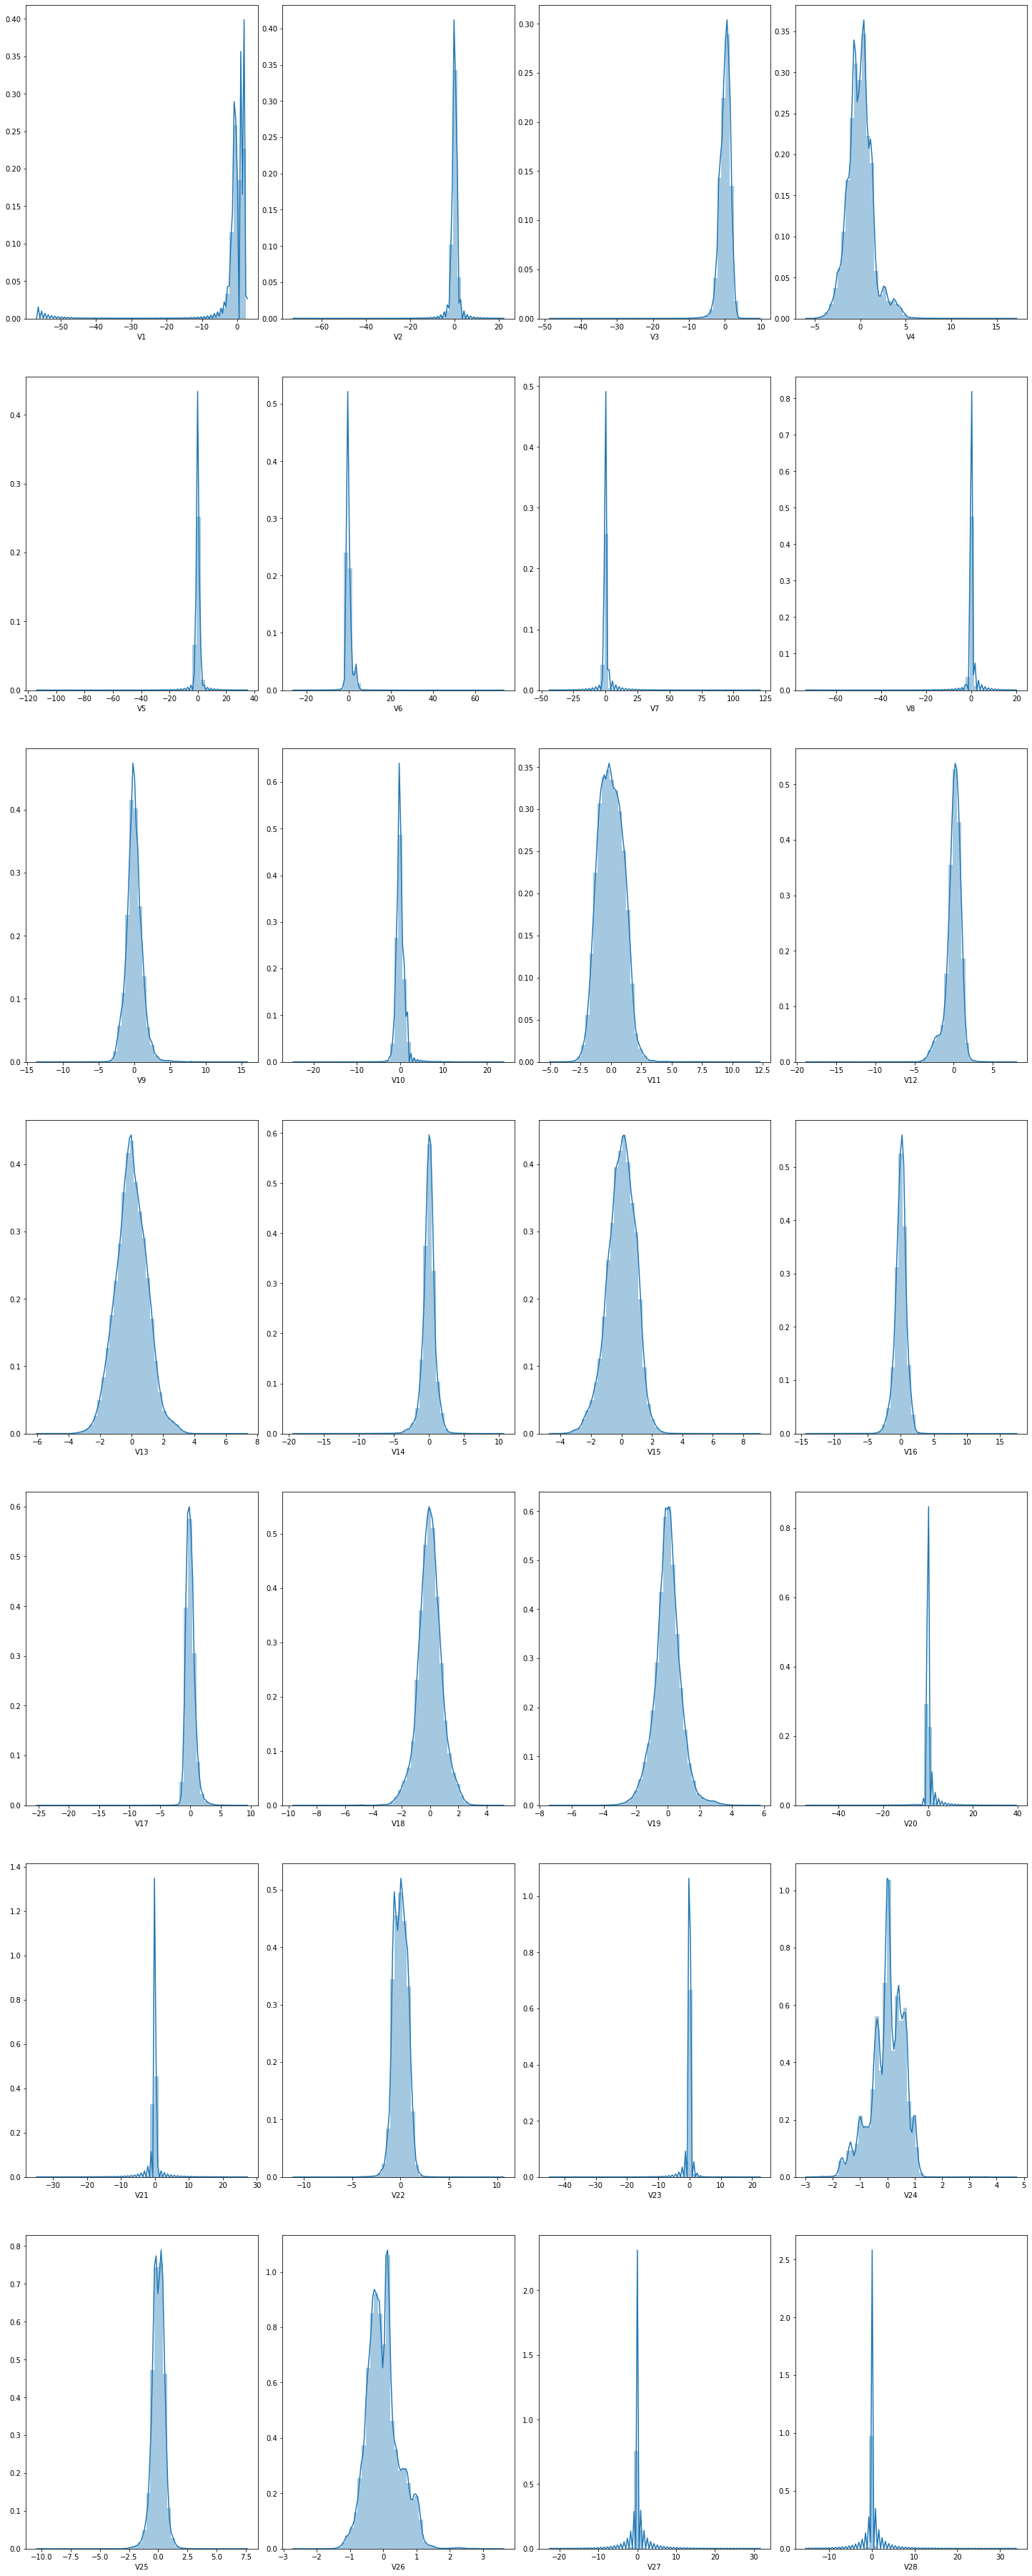

In [ ]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<AxesSubplot:xlabel='Time'>

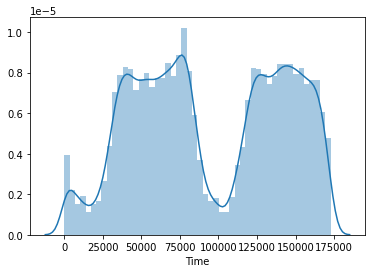

In [ ]:
sns.distplot(df['Time'])

<AxesSubplot:xlabel='Amount'>

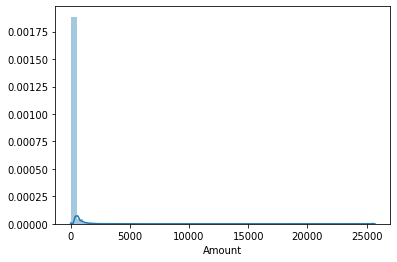

In [ ]:
sns.distplot(df['Amount'])

## Coorelation Matrix



In [112]:
correlation_matrix = df.corr()
top_features = correlation_matrix.index
print(top_features)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


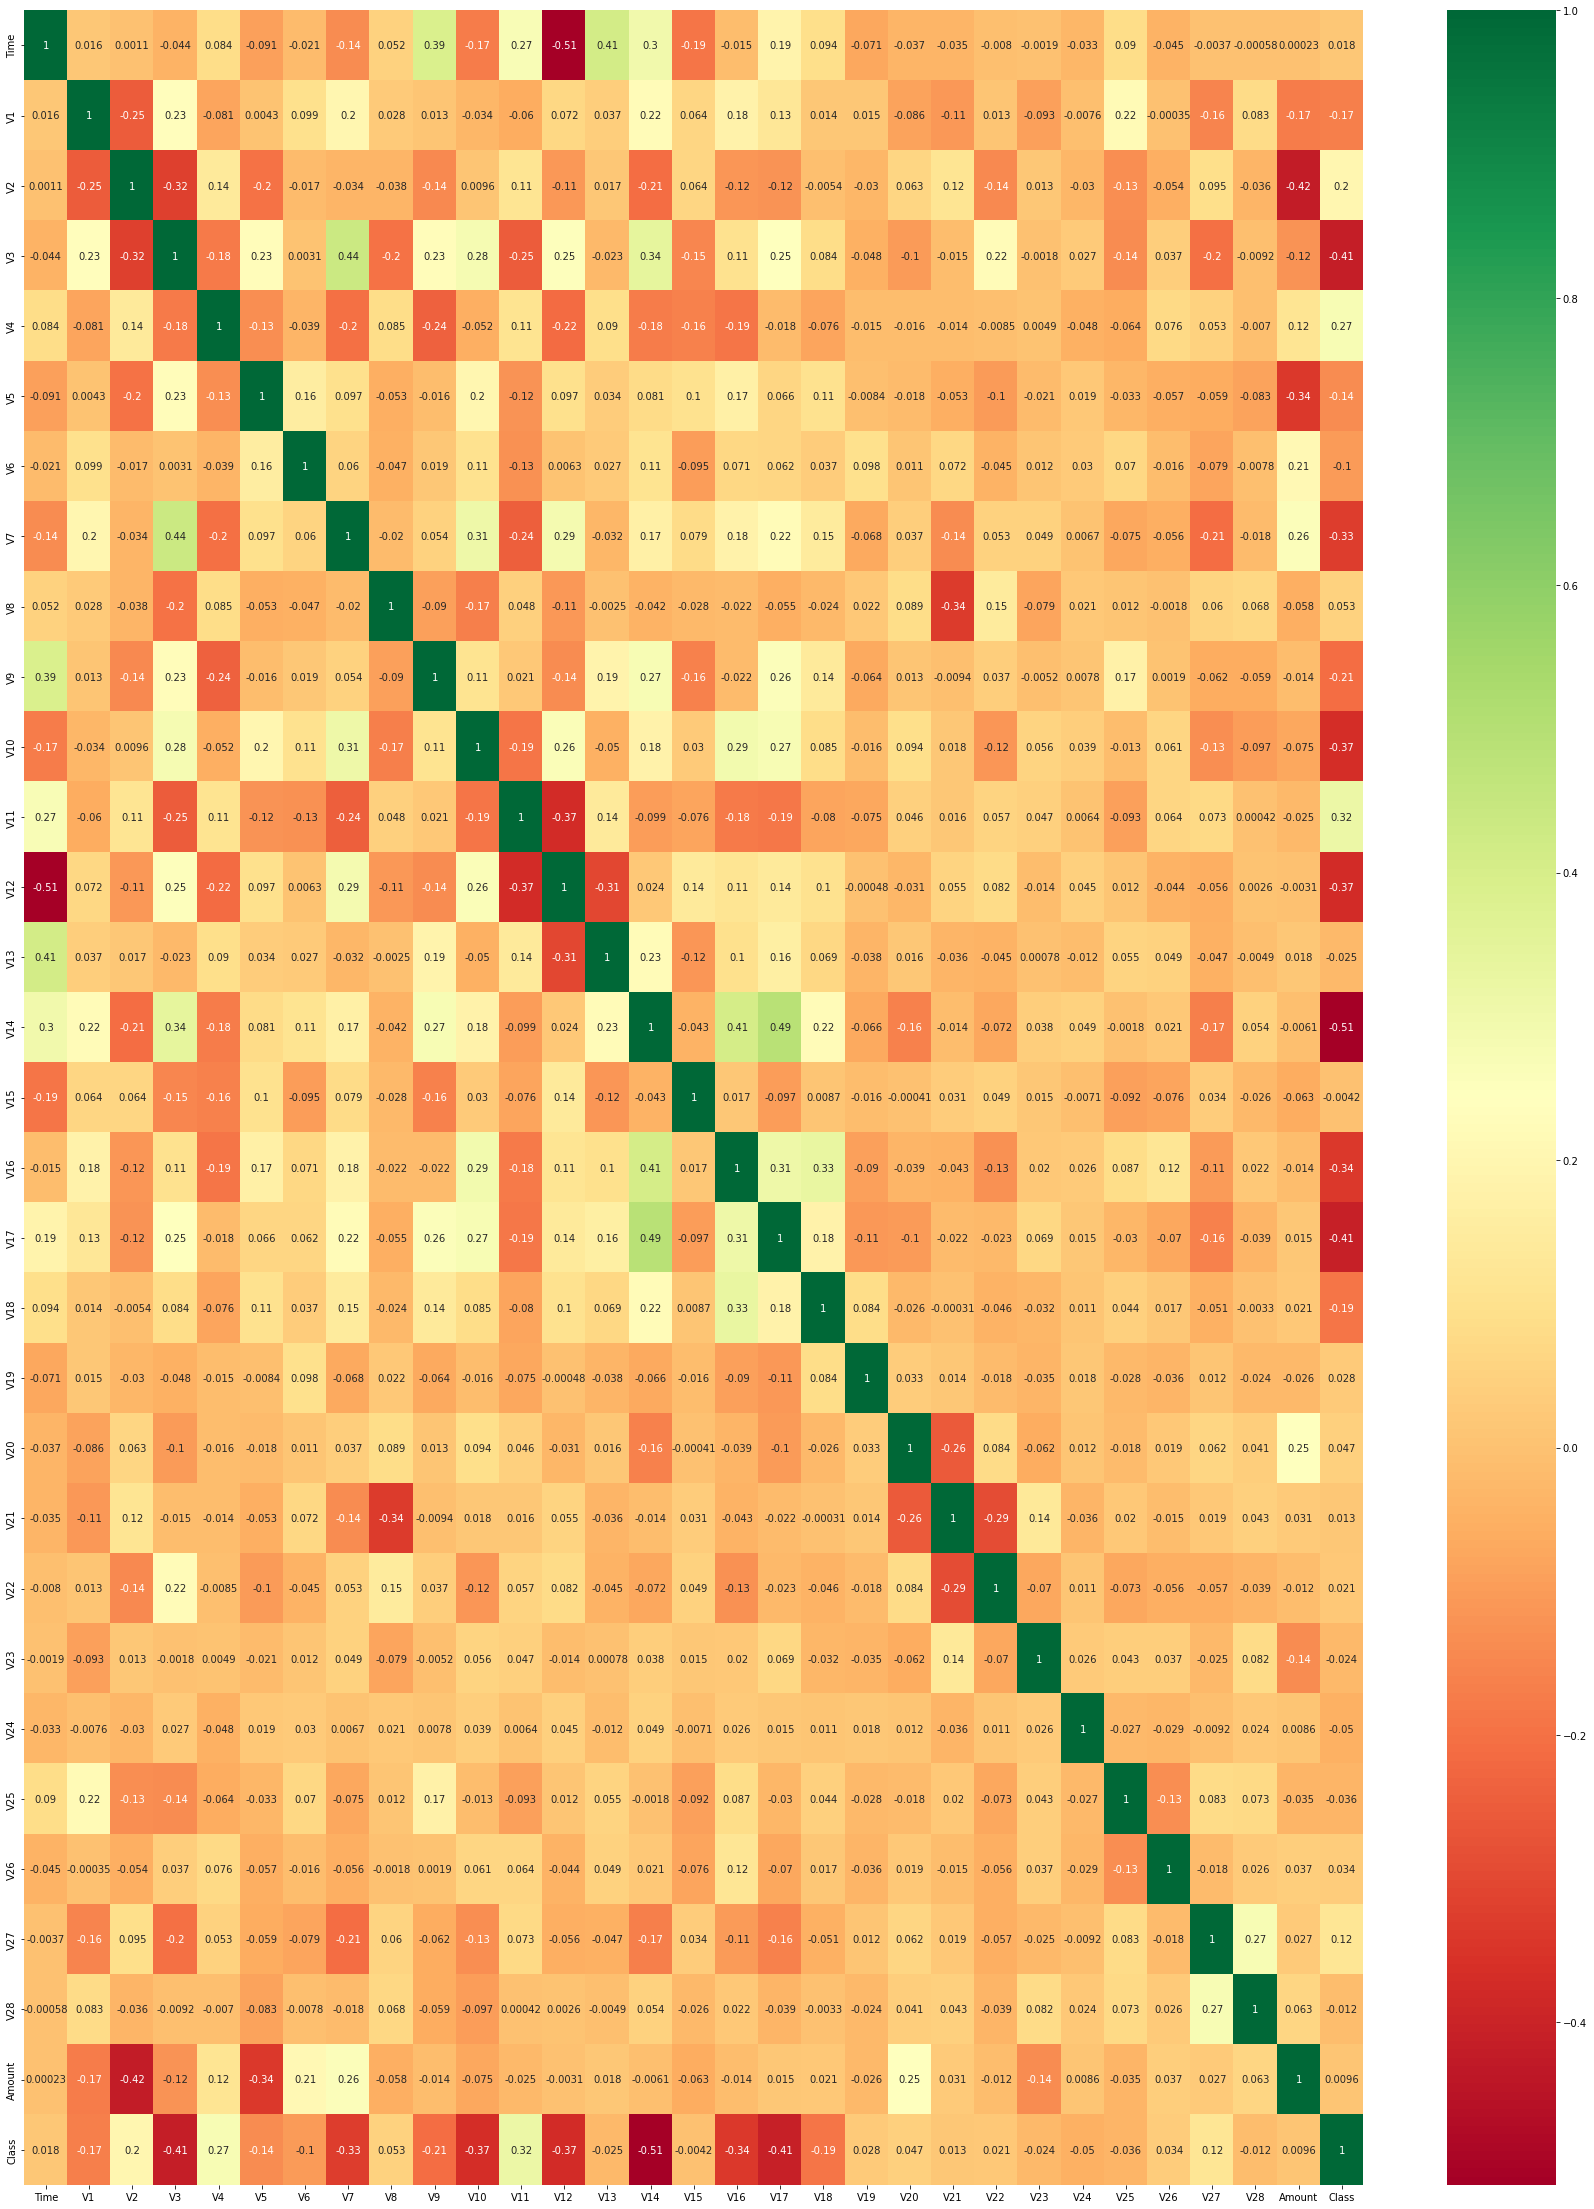

In [114]:
plt.figure(figsize=(30,40))
map = sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

## Input Split

In [118]:
print(map)

AxesSubplot(0.125,0.125;0.62x0.755)


In [94]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

## Standard Scaling

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [96]:
x_scaler[-1]

array([ 1.89135277e+00, -3.88400670e+00,  3.99345180e+00, -1.60025211e+00,
       -1.19400843e+00, -5.54626073e-01, -3.57808194e-01,  4.44948105e-01,
        3.13884780e-01,  4.23704150e+00,  6.80999287e+00,  1.85129907e+00,
       -1.70353338e-01,  5.42077711e-01, -1.38444190e+00,  4.31712406e-01,
       -3.18462635e-01, -1.28958303e-01, -2.24361564e-01, -1.11565106e+00,
        5.90123431e+00, -1.52949713e+00, -1.55546476e+00,  4.20013223e-01,
       -9.18575483e-01,  2.04157107e+00, -1.27929266e-01,  2.64954453e+00,
       -6.68567108e-01, -1.47801483e-14])

## Model Training

***Taking all Features first***

In [97]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [228]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       1.00      0.79      0.88        14

    accuracy                           1.00      3489
   macro avg       1.00      0.89      0.94      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.88
Accuracy score on Test Data :  0.999140154772141


In [229]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.93      0.93      0.93        14

    accuracy                           1.00      3489
   macro avg       0.96      0.96      0.96      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.9285714285714286
Accuracy score on Test Data :  0.999426769848094


In [230]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.87      0.93      0.90        14

    accuracy                           1.00      3489
   macro avg       0.93      0.96      0.95      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.896551724137931
Accuracy score on Test Data :  0.999140154772141


In [231]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.81      0.93      0.87        14

    accuracy                           1.00      3489
   macro avg       0.91      0.96      0.93      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.8666666666666666
Accuracy score on Test Data :  0.9988535396961881


## Class Imbalancement

(with all featueres taking into account)



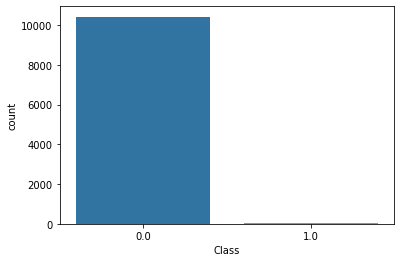

In [260]:
sns.countplot(y_train)

In [261]:

# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

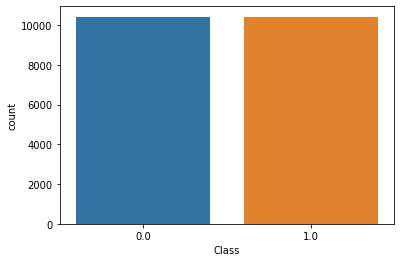

In [262]:
sns.countplot(y_smote)

In [263]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3475
         1.0       0.39      0.93      0.55        14

    accuracy                           0.99      3489
   macro avg       0.70      0.96      0.78      3489
weighted avg       1.00      0.99      1.00      3489

F1 Score: 0.5531914893617021
Accuracy score on Test Data :  0.9939810834049871


In [242]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.87      0.93      0.90        14

    accuracy                           1.00      3489
   macro avg       0.93      0.96      0.95      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.896551724137931
Accuracy score on Test Data :  0.999140154772141


In [243]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.81      0.93      0.87        14

    accuracy                           1.00      3489
   macro avg       0.91      0.96      0.93      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.8666666666666666
Accuracy score on Test Data :  0.9988535396961881


In [264]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.69      0.79      0.73        14

    accuracy                           1.00      3489
   macro avg       0.84      0.89      0.87      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.7333333333333334
Accuracy score on Test Data :  0.997707079392376


*** Screening out classifires on basis of Coorelation mattrix***


In [129]:
dfless = df.drop(columns=['V1', 'V8','V9','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V28','Class'], axis=1)
dfless_y=df['Class']

In [222]:
dfless.head()

,Time,V2,V3,V4,V5,V6,V7,V10,V11,V12,V14,V16,V17,V18,V27,Amount
0,0,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.133558,149.62
1,0,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.008983,2.69
2,1,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-0.055353,378.66
3,1,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0.062723,123.50
4,2,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.219422,69.99


Scaling the dataset 

In [148]:
sc = StandardScaler()
x_scaler_less = sc.fit_transform(dfless)

In [149]:
x_scaler_less[-1]

array([ 1.89135277e+00,  3.99345180e+00, -1.60025211e+00, -1.19400843e+00,
       -5.54626073e-01, -3.57808194e-01,  4.44948105e-01,  6.80999287e+00,
        1.85129907e+00, -1.70353338e-01, -1.38444190e+00, -3.18462635e-01,
       -1.28958303e-01, -2.24361564e-01,  2.64954453e+00, -1.47801483e-14])

In [150]:
# train test split
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(x_scaler_less, dfless_y, test_size=0.25, random_state=42, stratify=y)

In [244]:
model = LogisticRegression()
# training
model.fit(x_train_l, y_train_l)
# testing
y_pred_l = model.predict(x_test_l)
print(classification_report(y_test_l, y_pred_l))
print("F1 Score:",f1_score(y_test_l, y_pred_l))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.83      0.71      0.77        14

    accuracy                           1.00      3489
   macro avg       0.92      0.86      0.88      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.7692307692307692
Accuracy score on Test Data :  0.9988535396961881


In [245]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train_l, y_train_l)
# testing
y_pred_l = model.predict(x_test_l)
print(y_pred_l.shape)
print(classification_report(y_test_l, y_pred_l))
print("F1 Score:",f1_score(y_test_l, y_pred_l))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

(3489,)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.93      0.93      0.93        14

    accuracy                           1.00      3489
   macro avg       0.96      0.96      0.96      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.9285714285714286
Accuracy score on Test Data :  0.9988535396961881


In [246]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train_l, y_train_l)
# testing
y_pred_l = model.predict(x_test_l)
print(classification_report(y_test_l, y_pred_l))
print("F1 Score:",f1_score(y_test_l, y_pred_l))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.87      0.93      0.90        14

    accuracy                           1.00      3489
   macro avg       0.93      0.96      0.95      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.896551724137931
Accuracy score on Test Data :  0.9988535396961881


In [247]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# training
model.fit(x_train_l, y_train_l)
# testing
y_pred_l = model.predict(x_test_l)
print(classification_report(y_test_l, y_pred_l))
print("F1 Score:",f1_score(y_test_l, y_pred_l))
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.68      0.93      0.79        14

    accuracy                           1.00      3489
   macro avg       0.84      0.96      0.89      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.7878787878787878
Accuracy score on Test Data :  0.9988535396961881


Class Imbalancement
(for screened out classifires)

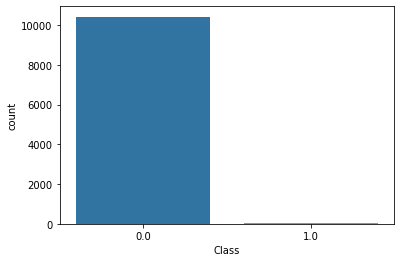

In [209]:
sns.countplot(y_train_l)

In [249]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train_l, y_train_l)

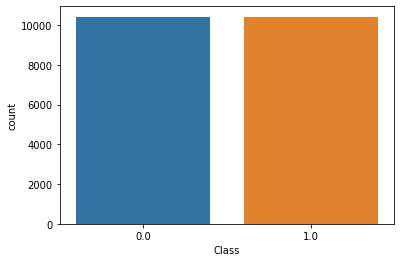

In [211]:
sns.countplot(y_smote)

In [255]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred_l = model.predict(x_test_l)
print(classification_report(y_test_l, y_pred_l))
print("F1 Score:",f1_score(y_test_l, y_pred_l))
test_data_accuracy = accuracy_score(y_pred_l, y_test_l)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3475
         1.0       0.30      0.93      0.46        14

    accuracy                           0.99      3489
   macro avg       0.65      0.96      0.73      3489
weighted avg       1.00      0.99      0.99      3489

F1 Score: 0.456140350877193
Accuracy score on Test Data :  0.9911149326454571


In [256]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred_l = model.predict(x_test_l)
print(classification_report(y_test_l, y_pred_l))
print("F1 Score:",f1_score(y_test_l, y_pred_l))
test_data_accuracy = accuracy_score(y_pred_l, y_test_l)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       1.00      0.86      0.92        14

    accuracy                           1.00      3489
   macro avg       1.00      0.93      0.96      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.923076923076923
Accuracy score on Test Data :  0.999426769848094


In [257]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred_l = model.predict(x_test_l)
print(classification_report(y_test_l, y_pred_l))
print("F1 Score:",f1_score(y_test_l, y_pred_l))
test_data_accuracy = accuracy_score(y_pred_l, y_test_l)
print('Accuracy score on Test Data : ', test_data_accuracy)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.81      0.93      0.87        14

    accuracy                           1.00      3489
   macro avg       0.91      0.96      0.93      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.8666666666666666
Accuracy score on Test Data :  0.9988535396961881


In [258]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
# training
model.fit(x_smote, y_smote)
# testing
y_pred_l = model.predict(x_test_l)
print(classification_report(y_test_l, y_pred_l))
print("F1 Score:",f1_score(y_test_l, y_pred_l))
test_data_accuracy = accuracy_score(y_pred_l, y_test_l)
print('Accuracy score on Test Data : ', test_data_accuracy)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3475
         1.0       0.71      0.86      0.77        14

    accuracy                           1.00      3489
   macro avg       0.85      0.93      0.89      3489
weighted avg       1.00      1.00      1.00      3489

F1 Score: 0.7741935483870968
Accuracy score on Test Data :  0.9979936944683291
